In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
wnba = pd.read_csv('wnba.csv')
wnba.head()

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,...,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
0,Aerial Powers,DAL,F,183,71.0,21.200991,US,"January 17, 1994",23,Michigan State,...,6,22,28,12,3,6,12,93,0,0
1,Alana Beard,LA,G/F,185,73.0,21.329438,US,"May 14, 1982",35,Duke,...,19,82,101,72,63,13,40,217,0,0
2,Alex Bentley,CON,G,170,69.0,23.875433,US,"October 27, 1990",26,Penn State,...,4,36,40,78,22,3,24,218,0,0
3,Alex Montgomery,SAN,G/F,185,84.0,24.543462,US,"December 11, 1988",28,Georgia Tech,...,35,134,169,65,20,10,38,188,2,0
4,Alexis Jones,MIN,G,175,78.0,25.469388,US,"August 5, 1994",23,Baylor,...,3,9,12,12,7,0,14,50,0,0


In [3]:
wnba.columns

Index(['Name', 'Team', 'Pos', 'Height', 'Weight', 'BMI', 'Birth_Place',
       'Birthdate', 'Age', 'College', 'Experience', 'Games Played', 'MIN',
       'FGM', 'FGA', 'FG%', '15:00', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB',
       'DREB', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PTS', 'DD2', 'TD3'],
      dtype='object')

# States Notes 

* Population- All individuals relevant to a particular statiscal question
* Sample- We call a smaller group from a population. i.e selecting 100 people out of 50,000 people
* Sampling error- Difference between the metrics of population and the metrics of a sample. The difference is an error
* Paramter- metric specific to a population
* Statistic - metric specific to a sample

In [4]:
parameter = wnba['Games Played'].max()                     # paremeter is 32
sample = wnba['Games Played'].sample(30, random_state=1)   # sample is a series sample of 30 data points
statistic = sample.max()                                   # Statistic is 30
sampling_error = parameter - statistic                     # Sampling error is 2

The goal is to minimize the sampling error as much as we can, to ensure our sample represents the population as accuraetly as possible. We want our samples to be representative of their corrosponding populations.

A sampling method we can use is **simple random sampling (SRS)**

(100.0, 300.0)

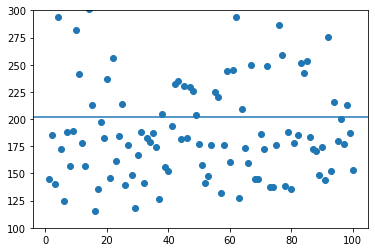

In [5]:
# Using random sampling to measure the average points scored by a player during 2016-2017 season

population_mean = wnba.PTS.mean()                                        # mean is 201
sample_means = []                                                        # list of averaged samples from sampling

for i in range(100):                                                     # take 100 samples of 10 values each
    sample = wnba.PTS.sample(10, random_state=i)
    sample_means.append(sample.mean())                                   # finding the mean of each sample
    
plt.scatter(range(1,101), sample_means)
plt.axhline(population_mean)
plt.ylim(100,300)

With a relatively small sample size, the sample mean varies a lot from the population mean. As a result, **the sampling error** will be quite large for some case. If we were to run an analysis, will not get results that will accurately represent the population. We will now increase the sample size to measure the dispersion 

(100.0, 300.0)

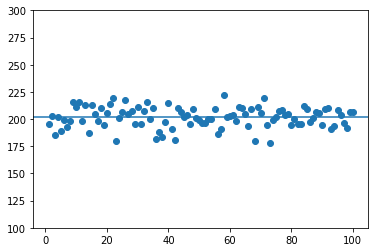

In [6]:
population_mean = wnba.PTS.mean()                                        # mean is 201
sample_means = []                                                        # list of averaged samples from sampling

for i in range(100):                                                     # take 100 samples of 100 values each
    sample = wnba.PTS.sample(100, random_state=i)
    sample_means.append(sample.mean())                                   # finding the mean of each sample
    
plt.scatter(range(1,101), sample_means)
plt.axhline(population_mean)
plt.ylim(100,300)

The sample mean now varies less around the population mean as the sample size is increased. Conculsions:
* Simple Random Sampling is not reliable sampling method when sample size is small
* A large sample decreases the variability of the sampling process

# Stratified sampling <br>
Organizing data into different groups, and then doing a **simple random sampling** for every group. We then call each stratified group a **stratum**

We will not conduct a stratified sampling on the Women NBA dataset, because our previous sampling may exclude certain population individuals who are relevants to our questions. An examples are players who play different positions on the court. The metrics of a player (number of points, number of assists, etc.) depend on their position, and we might want to analyze the patterns for each individual position.

If we peform simple random sampling, there is a chance our sample will not include some categories

In [7]:
print(wnba['Pos'].unique())

['F' 'G/F' 'G' 'C' 'F/C']


In [8]:
wnba[['Name','PTS', 'Games Played']]

,Name,PTS,Games Played
0,Aerial Powers,93,8
1,Alana Beard,217,30
2,Alex Bentley,218,26
3,Alex Montgomery,188,31
4,Alexis Jones,50,24
...,...,...,...
138,Tiffany Hayes,467,29
139,Tiffany Jackson,28,22
140,Tiffany Mitchell,277,27
141,Tina Charles,582,29


In [9]:
# Creating a new column describing the average points scored per game this season
wnba['points_per_game'] = wnba['PTS'] / wnba['Games Played']
wnba[['Name','PTS', 'Games Played','points_per_game']]

,Name,PTS,Games Played,points_per_game
0,Aerial Powers,93,8,11.625000
1,Alana Beard,217,30,7.233333
2,Alex Bentley,218,26,8.384615
3,Alex Montgomery,188,31,6.064516
4,Alexis Jones,50,24,2.083333
...,...,...,...,...
138,Tiffany Hayes,467,29,16.103448
139,Tiffany Jackson,28,22,1.272727
140,Tiffany Mitchell,277,27,10.259259
141,Tina Charles,582,29,20.068966


In [10]:
# finding player positions 

print(wnba['Pos'].unique())

['F' 'G/F' 'G' 'C' 'F/C']


In [11]:
#stratifying the player positions

stratum_G = wnba[wnba.Pos == 'G']
stratum_F = wnba[wnba.Pos == 'F']
stratum_C = wnba[wnba.Pos == 'C']
stratum_GF = wnba[wnba.Pos == 'G/F']
stratum_FC = wnba[wnba.Pos == 'F/C']

# random sampling from each stratum and finding means
points_per_position = {}
for stratum, position in [(stratum_G, 'G'), (stratum_F, 'F'), (stratum_C, 'C'), (stratum_GF, 'G/F'), (stratum_FC, 'F/C')]:
    sample = stratum['points_per_game'].sample(10, random_state=0)
    points_per_position[position] = sample.mean()
    
# finding the position with the highest score and what score
print(max(points_per_position, key=points_per_position.get),':', max(points_per_position.values()))

C : 9.833761394334251


We can now determine that Center's score the most points in a game with a average of 9 points a game

# Stratified sampling from proportional distributions
The problem we now face is not every player plays the same number of games. We may pick a sample that only consists of players who play less than 12 games in a season or players who play more than 22. This will results in samples that do not represent the population.

In [12]:
wnba['Games Played'].value_counts(bins=3, normalize= True) *100

(22.0, 32.0]     72.727273
(12.0, 22.0]     18.181818
(1.969, 12.0]     9.090909
Name: Games Played, dtype: float64

We can see that approximately 73% of the players had more than 23 games for the season.

This is important because we may only get a sample that has 2% of the players who played more than 23 games. This higher played players significantly influence the mean. Therefore, we need to gather a sample size that will farely represent the proportions of games played by each player. The **proportions are 70%, 20% and 10%.**

<h3>I will create 3 stratum seperating the players into how many games they played:</h3>

In [13]:
less_than_12 = wnba[wnba['Games Played'] <= 12]
between13_22 = wnba[(wnba['Games Played'] > 12) & (wnba['Games Played']<=22)]
more_than_22 = wnba[wnba['Games Played'] > 22]

proportional_sampling_means = []
for i in range(100):
    sample_less_than_12 = less_than_12['PTS'].sample(1, random_state=i)
    sample_between13_22 = between13_22['PTS'].sample(2, random_state=i)
    sample_more_than_22 = more_than_22['PTS'].sample(7, random_state=i)
    final_sample = pd.concat([sample_less_than_12, sample_between13_22, sample_more_than_22])
    proportional_sampling_means.append(final_sample.mean())

(100.0, 350.0)

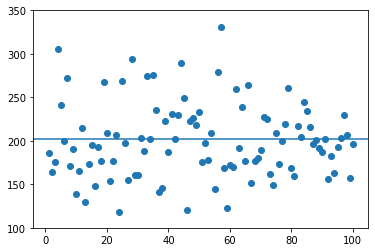

In [14]:
plt.scatter(range(1,101), proportional_sampling_means)
plt.axhline(wnba['PTS'].mean())
plt.ylim(100,350)

<h3>Guidlines for choosing good strate</h3> <br>

* Minimize the variability within each stratum
    * Avoid having i.e a player who score 10 points vs. one who scores 500 points in a season
* Maximize the variability between strate
* Stratification criterion should correlate strongly with the property you're trying to measure
    * For instance, the column describing minutes played (the criterion) should be correlate strongly with the number of total points (property we want to measure)

# Cluster sampling 


In [15]:
print(wnba['Team'].unique())

['DAL' 'LA' 'CON' 'SAN' 'MIN' 'SEA' 'PHO' 'CHI' 'WAS' 'NY' 'ATL' 'IND']


In [17]:
pd.Series(wnba['Team'].unique()).sample(4, random_state=0)

6     PHO
11    IND
4     MIN
10    ATL
dtype: object

In [19]:
sample = pd.DataFrame()

for cluster in clusters:
    data_collected = wnba[wnba['Team'] == cluster]
    sample = sample.append(data_collected)

NameError: name 'clusters' is not defined